# Red Inicial


## Imports


In [1]:
from __future__ import annotations

from time import perf_counter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from custom_env.actions import Acciones
from custom_env.router_env import RouterEnv
from custom_env.utils import Color, Location
from gymnasium import make
from gymnasium.utils.env_checker import check_env
from pandas import DataFrame, Series
from stable_baselines3 import PPO
from stable_baselines3.common.env_checker import check_env
from stable_baselines3.common.logger import Logger, configure
from stable_baselines3.common.monitor import Monitor

Cargado a las 2025-05-07 13:55:58.403745


In [2]:
name = "./models/Example"
logs_path = "./logs/train/"
models_path = "./models/"
env_id = "RouterEnv-v0"

progress_bar = True
if progress_bar == True:
    import rich
    import tqdm

## Clases y Funciones


In [3]:
tiempo_global: float = 0.0
iteraciones = 0
# Decaorador auxiliar para poder medir el tiempo de las funciones


def medir_tiempo(activado=False):
    def fun(funcion):
        def wrapper(*args, **kwargs):
            if not activado:
                return funcion(*args, **kwargs)
            fun_tiempo = perf_counter
            inicio: float = fun_tiempo()
            resultado = funcion(*args, **kwargs)
            tiempo_total: float = fun_tiempo() - inicio
            global tiempo_global, iteraciones
            medida = 1e6
            t: float = tiempo_total*medida
            tiempo_global += t
            iteraciones += 1
            print(f"Tiempo de ejecución de {
                funcion.__name__}: {t:.2f} micro-segundos")
            return resultado
        return wrapper
    return fun


def calcular_stats_acciones(acciones):
    if isinstance(acciones[-1], int):
        acciones = [Acciones.int_to_action(a) for a in acciones]
    print(f"{Acciones.DENEGAR.name}: {acciones.count(Acciones.DENEGAR)/len(acciones):.2%}")
    print(f"{Acciones.PERMITIR.name}: {acciones.count(Acciones.PERMITIR)/len(acciones):.2%}")

## Entrenamiento


In [4]:
seed = None
env: RouterEnv = make(env_id, seed=seed)

check_env(env)

print("Seed: ", env._np_random_seed)

new_logger: Logger = configure(logs_path, ["stdout", "csv"])
env = Monitor(env, logs_path)


model: PPO = PPO("MultiInputPolicy", env,
                 verbose=True)


model.set_logger(new_logger)
try:
    model.learn(total_timesteps=int(1e5//1),
                progress_bar=progress_bar)
except KeyboardInterrupt:
    print("Entrenamiento interrumpido")


g: str = input("¿Desea guardarlo? (s/n) ")
if g.lower() == "s":
    model.save(name)
    print("Modelo guardado")

Seed:  271045649160146619273366911874960796804
Logging to ./logs/train/


Using cpu device
Wrapping the env in a DummyVecEnv.


Output()

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 400      |
|    ep_rew_mean     | -502     |
| time/              |          |
|    fps             | 513      |
|    iterations      | 1        |
|    time_elapsed    | 3        |
|    total_timesteps | 2048     |
---------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 400        |
|    ep_rew_mean          | -300       |
| time/                   |            |
|    fps                  | 432        |
|    iterations           | 2          |
|    time_elapsed         | 9          |
|    total_timesteps      | 4096       |
| train/                  |            |
|    approx_kl            | 0.00655795 |
|    clip_fraction        | 0.0394     |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.687     |
|    explained_variance   | -0.00318   |
|    learning_rate        | 0.0003     |
|    loss                 | 616        |
|    n_updates            | 10         |
|    policy_gradient_loss | -0.0049    |
|    value_loss           | 2.51e+03   |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | -227        |
| time/                   |             |
|    fps                  | 403         |
|    iterations           | 3           |
|    time_elapsed         | 15          |
|    total_timesteps      | 6144        |
| train/                  |             |
|    approx_kl            | 0.017510088 |
|    clip_fraction        | 0.0697      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.686      |
|    explained_variance   | -0.437      |
|    learning_rate        | 0.0003      |
|    loss                 | 8.66        |
|    n_updates            | 20          |
|    policy_gradient_loss | -0.0134     |
|    value_loss           | 16.3        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | -179        |
| time/                   |             |
|    fps                  | 398         |
|    iterations           | 4           |
|    time_elapsed         | 20          |
|    total_timesteps      | 8192        |
| train/                  |             |
|    approx_kl            | 0.015606673 |
|    clip_fraction        | 0.202       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.647      |
|    explained_variance   | 0.0441      |
|    learning_rate        | 0.0003      |
|    loss                 | 4.52        |
|    n_updates            | 30          |
|    policy_gradient_loss | -0.0243     |
|    value_loss           | 11.2        |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | -305         |
| time/                   |              |
|    fps                  | 395          |
|    iterations           | 5            |
|    time_elapsed         | 25           |
|    total_timesteps      | 10240        |
| train/                  |              |
|    approx_kl            | 0.0019160195 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.621       |
|    explained_variance   | 0.0109       |
|    learning_rate        | 0.0003       |
|    loss                 | 791          |
|    n_updates            | 40           |
|    policy_gradient_loss | -0.00052     |
|    value_loss           | 1.96e+03     |
------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 400           |
|    ep_rew_mean          | -257          |
| time/                   |               |
|    fps                  | 406           |
|    iterations           | 6             |
|    time_elapsed         | 30            |
|    total_timesteps      | 12288         |
| train/                  |               |
|    approx_kl            | 0.00014264572 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.615        |
|    explained_variance   | 0.0277        |
|    learning_rate        | 0.0003        |
|    loss                 | 5.68e+03      |
|    n_updates            | 50            |
|    policy_gradient_loss | -0.000318     |
|    value_loss           | 5.58e+03      |
-------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | -435        |
| time/                   |             |
|    fps                  | 406         |
|    iterations           | 7           |
|    time_elapsed         | 35          |
|    total_timesteps      | 14336       |
| train/                  |             |
|    approx_kl            | 0.013724199 |
|    clip_fraction        | 0.104       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.573      |
|    explained_variance   | -0.955      |
|    learning_rate        | 0.0003      |
|    loss                 | 9.63        |
|    n_updates            | 60          |
|    policy_gradient_loss | -0.0122     |
|    value_loss           | 15.3        |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | -455         |
| time/                   |              |
|    fps                  | 403          |
|    iterations           | 8            |
|    time_elapsed         | 40           |
|    total_timesteps      | 16384        |
| train/                  |              |
|    approx_kl            | 2.506128e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.507       |
|    explained_variance   | 0.0377       |
|    learning_rate        | 0.0003       |
|    loss                 | 4.61e+03     |
|    n_updates            | 70           |
|    policy_gradient_loss | 0.000345     |
|    value_loss           | 9.61e+03     |
------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 400           |
|    ep_rew_mean          | -551          |
| time/                   |               |
|    fps                  | 399           |
|    iterations           | 9             |
|    time_elapsed         | 46            |
|    total_timesteps      | 18432         |
| train/                  |               |
|    approx_kl            | 0.00025940425 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.533        |
|    explained_variance   | 0.0543        |
|    learning_rate        | 0.0003        |
|    loss                 | 2.35e+03      |
|    n_updates            | 80            |
|    policy_gradient_loss | -0.00044      |
|    value_loss           | 4.46e+03      |
-------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 400           |
|    ep_rew_mean          | -653          |
| time/                   |               |
|    fps                  | 401           |
|    iterations           | 10            |
|    time_elapsed         | 51            |
|    total_timesteps      | 20480         |
| train/                  |               |
|    approx_kl            | 1.4014659e-06 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.527        |
|    explained_variance   | 0.069         |
|    learning_rate        | 0.0003        |
|    loss                 | 6.06e+03      |
|    n_updates            | 90            |
|    policy_gradient_loss | 1.05e-05      |
|    value_loss           | 1.38e+04      |
-------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 400           |
|    ep_rew_mean          | -661          |
| time/                   |               |
|    fps                  | 404           |
|    iterations           | 11            |
|    time_elapsed         | 55            |
|    total_timesteps      | 22528         |
| train/                  |               |
|    approx_kl            | 6.9087837e-06 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.534        |
|    explained_variance   | 0.107         |
|    learning_rate        | 0.0003        |
|    loss                 | 6.78e+03      |
|    n_updates            | 100           |
|    policy_gradient_loss | -2.88e-05     |
|    value_loss           | 1.54e+04      |
-------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | -636         |
| time/                   |              |
|    fps                  | 407          |
|    iterations           | 12           |
|    time_elapsed         | 60           |
|    total_timesteps      | 24576        |
| train/                  |              |
|    approx_kl            | 0.0006200116 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.545       |
|    explained_variance   | 0.128        |
|    learning_rate        | 0.0003       |
|    loss                 | 3.46e+03     |
|    n_updates            | 110          |
|    policy_gradient_loss | -0.00103     |
|    value_loss           | 6.1e+03      |
------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 400           |
|    ep_rew_mean          | -589          |
| time/                   |               |
|    fps                  | 412           |
|    iterations           | 13            |
|    time_elapsed         | 64            |
|    total_timesteps      | 26624         |
| train/                  |               |
|    approx_kl            | 0.00031947473 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.559        |
|    explained_variance   | 0.299         |
|    learning_rate        | 0.0003        |
|    loss                 | 1.49e+03      |
|    n_updates            | 120           |
|    policy_gradient_loss | -0.000477     |
|    value_loss           | 1.56e+03      |
-------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | -630         |
| time/                   |              |
|    fps                  | 415          |
|    iterations           | 14           |
|    time_elapsed         | 68           |
|    total_timesteps      | 28672        |
| train/                  |              |
|    approx_kl            | 0.0047805505 |
|    clip_fraction        | 0.022        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.596       |
|    explained_variance   | 0.494        |
|    learning_rate        | 0.0003       |
|    loss                 | 15.6         |
|    n_updates            | 130          |
|    policy_gradient_loss | -0.00394     |
|    value_loss           | 48.7         |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | -591         |
| time/                   |              |
|    fps                  | 414          |
|    iterations           | 15           |
|    time_elapsed         | 74           |
|    total_timesteps      | 30720        |
| train/                  |              |
|    approx_kl            | 0.0021681422 |
|    clip_fraction        | 0.000684     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.617       |
|    explained_variance   | 0.242        |
|    learning_rate        | 0.0003       |
|    loss                 | 5.29e+03     |
|    n_updates            | 140          |
|    policy_gradient_loss | -0.00339     |
|    value_loss           | 7.55e+03     |
------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 400           |
|    ep_rew_mean          | -628          |
| time/                   |               |
|    fps                  | 418           |
|    iterations           | 16            |
|    time_elapsed         | 78            |
|    total_timesteps      | 32768         |
| train/                  |               |
|    approx_kl            | 0.00027833093 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.624        |
|    explained_variance   | -0.28         |
|    learning_rate        | 0.0003        |
|    loss                 | 12.5          |
|    n_updates            | 150           |
|    policy_gradient_loss | -0.000422     |
|    value_loss           | 32.6          |
-------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | -608         |
| time/                   |              |
|    fps                  | 420          |
|    iterations           | 17           |
|    time_elapsed         | 82           |
|    total_timesteps      | 34816        |
| train/                  |              |
|    approx_kl            | 0.0032359897 |
|    clip_fraction        | 0.00586      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.623       |
|    explained_variance   | 0.276        |
|    learning_rate        | 0.0003       |
|    loss                 | 5.03e+03     |
|    n_updates            | 160          |
|    policy_gradient_loss | -0.00348     |
|    value_loss           | 9.3e+03      |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | -577         |
| time/                   |              |
|    fps                  | 423          |
|    iterations           | 18           |
|    time_elapsed         | 87           |
|    total_timesteps      | 36864        |
| train/                  |              |
|    approx_kl            | 0.0046949945 |
|    clip_fraction        | 0.0335       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.635       |
|    explained_variance   | 0.475        |
|    learning_rate        | 0.0003       |
|    loss                 | 908          |
|    n_updates            | 170          |
|    policy_gradient_loss | -0.00494     |
|    value_loss           | 1.88e+03     |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | -560        |
| time/                   |             |
|    fps                  | 424         |
|    iterations           | 19          |
|    time_elapsed         | 91          |
|    total_timesteps      | 38912       |
| train/                  |             |
|    approx_kl            | 0.009474684 |
|    clip_fraction        | 0.00664     |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.657      |
|    explained_variance   | 0.197       |
|    learning_rate        | 0.0003      |
|    loss                 | 16.4        |
|    n_updates            | 180         |
|    policy_gradient_loss | -0.00364    |
|    value_loss           | 31.5        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | -526        |
| time/                   |             |
|    fps                  | 423         |
|    iterations           | 20          |
|    time_elapsed         | 96          |
|    total_timesteps      | 40960       |
| train/                  |             |
|    approx_kl            | 0.004148879 |
|    clip_fraction        | 0.0133      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.664      |
|    explained_variance   | 0.721       |
|    learning_rate        | 0.0003      |
|    loss                 | 172         |
|    n_updates            | 190         |
|    policy_gradient_loss | -0.00579    |
|    value_loss           | 345         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | -524        |
| time/                   |             |
|    fps                  | 424         |
|    iterations           | 21          |
|    time_elapsed         | 101         |
|    total_timesteps      | 43008       |
| train/                  |             |
|    approx_kl            | 0.012962328 |
|    clip_fraction        | 0.0607      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.665      |
|    explained_variance   | 0.297       |
|    learning_rate        | 0.0003      |
|    loss                 | 16.1        |
|    n_updates            | 200         |
|    policy_gradient_loss | -0.00559    |
|    value_loss           | 25.8        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | -537        |
| time/                   |             |
|    fps                  | 424         |
|    iterations           | 22          |
|    time_elapsed         | 106         |
|    total_timesteps      | 45056       |
| train/                  |             |
|    approx_kl            | 0.014744888 |
|    clip_fraction        | 0.126       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.621      |
|    explained_variance   | 0.48        |
|    learning_rate        | 0.0003      |
|    loss                 | 10.5        |
|    n_updates            | 210         |
|    policy_gradient_loss | -0.0116     |
|    value_loss           | 18.3        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | -535        |
| time/                   |             |
|    fps                  | 427         |
|    iterations           | 23          |
|    time_elapsed         | 110         |
|    total_timesteps      | 47104       |
| train/                  |             |
|    approx_kl            | 0.004405316 |
|    clip_fraction        | 0.00508     |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.627      |
|    explained_variance   | 0.692       |
|    learning_rate        | 0.0003      |
|    loss                 | 221         |
|    n_updates            | 220         |
|    policy_gradient_loss | -0.00258    |
|    value_loss           | 573         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | -499        |
| time/                   |             |
|    fps                  | 425         |
|    iterations           | 24          |
|    time_elapsed         | 115         |
|    total_timesteps      | 49152       |
| train/                  |             |
|    approx_kl            | 0.006144751 |
|    clip_fraction        | 0.0398      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.59       |
|    explained_variance   | 0.151       |
|    learning_rate        | 0.0003      |
|    loss                 | 5.05        |
|    n_updates            | 230         |
|    policy_gradient_loss | -0.00139    |
|    value_loss           | 13.5        |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | -501         |
| time/                   |              |
|    fps                  | 426          |
|    iterations           | 25           |
|    time_elapsed         | 119          |
|    total_timesteps      | 51200        |
| train/                  |              |
|    approx_kl            | 0.0050796093 |
|    clip_fraction        | 0.0187       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.593       |
|    explained_variance   | 0.758        |
|    learning_rate        | 0.0003       |
|    loss                 | 80.9         |
|    n_updates            | 240          |
|    policy_gradient_loss | -0.00491     |
|    value_loss           | 100          |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | -453         |
| time/                   |              |
|    fps                  | 428          |
|    iterations           | 26           |
|    time_elapsed         | 124          |
|    total_timesteps      | 53248        |
| train/                  |              |
|    approx_kl            | 0.0040105917 |
|    clip_fraction        | 0.0158       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.6         |
|    explained_variance   | 0.835        |
|    learning_rate        | 0.0003       |
|    loss                 | 11.2         |
|    n_updates            | 250          |
|    policy_gradient_loss | -0.00532     |
|    value_loss           | 45.3         |
------------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 400        |
|    ep_rew_mean          | -432       |
| time/                   |            |
|    fps                  | 429        |
|    iterations           | 27         |
|    time_elapsed         | 128        |
|    total_timesteps      | 55296      |
| train/                  |            |
|    approx_kl            | 0.01001836 |
|    clip_fraction        | 0.121      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.568     |
|    explained_variance   | 0.59       |
|    learning_rate        | 0.0003     |
|    loss                 | 7.07       |
|    n_updates            | 260        |
|    policy_gradient_loss | -0.00889   |
|    value_loss           | 23.9       |
----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | -332         |
| time/                   |              |
|    fps                  | 432          |
|    iterations           | 28           |
|    time_elapsed         | 132          |
|    total_timesteps      | 57344        |
| train/                  |              |
|    approx_kl            | 0.0045782775 |
|    clip_fraction        | 0.0136       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.534       |
|    explained_variance   | 0.775        |
|    learning_rate        | 0.0003       |
|    loss                 | 19.5         |
|    n_updates            | 270          |
|    policy_gradient_loss | -0.000286    |
|    value_loss           | 26           |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | -253         |
| time/                   |              |
|    fps                  | 432          |
|    iterations           | 29           |
|    time_elapsed         | 137          |
|    total_timesteps      | 59392        |
| train/                  |              |
|    approx_kl            | 0.0016722648 |
|    clip_fraction        | 0.0104       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.506       |
|    explained_variance   | 0.806        |
|    learning_rate        | 0.0003       |
|    loss                 | 12.6         |
|    n_updates            | 280          |
|    policy_gradient_loss | -0.00128     |
|    value_loss           | 21.9         |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | -229         |
| time/                   |              |
|    fps                  | 432          |
|    iterations           | 30           |
|    time_elapsed         | 141          |
|    total_timesteps      | 61440        |
| train/                  |              |
|    approx_kl            | 0.0040461496 |
|    clip_fraction        | 0.0661       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.462       |
|    explained_variance   | 0.358        |
|    learning_rate        | 0.0003       |
|    loss                 | 3.92         |
|    n_updates            | 290          |
|    policy_gradient_loss | -0.00311     |
|    value_loss           | 8.32         |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | -230        |
| time/                   |             |
|    fps                  | 430         |
|    iterations           | 31          |
|    time_elapsed         | 147         |
|    total_timesteps      | 63488       |
| train/                  |             |
|    approx_kl            | 0.002083016 |
|    clip_fraction        | 0.00845     |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.493      |
|    explained_variance   | 0.621       |
|    learning_rate        | 0.0003      |
|    loss                 | 87          |
|    n_updates            | 300         |
|    policy_gradient_loss | -0.00398    |
|    value_loss           | 276         |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | -221         |
| time/                   |              |
|    fps                  | 432          |
|    iterations           | 32           |
|    time_elapsed         | 151          |
|    total_timesteps      | 65536        |
| train/                  |              |
|    approx_kl            | 0.0018062321 |
|    clip_fraction        | 0.0106       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.483       |
|    explained_variance   | 0.782        |
|    learning_rate        | 0.0003       |
|    loss                 | 293          |
|    n_updates            | 310          |
|    policy_gradient_loss | -0.00339     |
|    value_loss           | 247          |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | -227         |
| time/                   |              |
|    fps                  | 432          |
|    iterations           | 33           |
|    time_elapsed         | 156          |
|    total_timesteps      | 67584        |
| train/                  |              |
|    approx_kl            | 0.0010240879 |
|    clip_fraction        | 0.00122      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.469       |
|    explained_variance   | 0.833        |
|    learning_rate        | 0.0003       |
|    loss                 | 10.5         |
|    n_updates            | 320          |
|    policy_gradient_loss | -0.000494    |
|    value_loss           | 64           |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | -173         |
| time/                   |              |
|    fps                  | 432          |
|    iterations           | 34           |
|    time_elapsed         | 161          |
|    total_timesteps      | 69632        |
| train/                  |              |
|    approx_kl            | 0.0017681842 |
|    clip_fraction        | 0.0155       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.462       |
|    explained_variance   | 0.872        |
|    learning_rate        | 0.0003       |
|    loss                 | 43.1         |
|    n_updates            | 330          |
|    policy_gradient_loss | -0.00345     |
|    value_loss           | 127          |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | -165         |
| time/                   |              |
|    fps                  | 433          |
|    iterations           | 35           |
|    time_elapsed         | 165          |
|    total_timesteps      | 71680        |
| train/                  |              |
|    approx_kl            | 0.0066013243 |
|    clip_fraction        | 0.101        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.418       |
|    explained_variance   | -1.37        |
|    learning_rate        | 0.0003       |
|    loss                 | 1.76         |
|    n_updates            | 340          |
|    policy_gradient_loss | -0.00549     |
|    value_loss           | 17           |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | -99.5        |
| time/                   |              |
|    fps                  | 435          |
|    iterations           | 36           |
|    time_elapsed         | 169          |
|    total_timesteps      | 73728        |
| train/                  |              |
|    approx_kl            | 0.0009475467 |
|    clip_fraction        | 0.00552      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.435       |
|    explained_variance   | 0.632        |
|    learning_rate        | 0.0003       |
|    loss                 | 47.6         |
|    n_updates            | 350          |
|    policy_gradient_loss | -0.00265     |
|    value_loss           | 69           |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | -99.9       |
| time/                   |             |
|    fps                  | 436         |
|    iterations           | 37          |
|    time_elapsed         | 173         |
|    total_timesteps      | 75776       |
| train/                  |             |
|    approx_kl            | 0.005044452 |
|    clip_fraction        | 0.0487      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.396      |
|    explained_variance   | 0.675       |
|    learning_rate        | 0.0003      |
|    loss                 | 6.25        |
|    n_updates            | 360         |
|    policy_gradient_loss | -0.00181    |
|    value_loss           | 13.1        |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | -88.5        |
| time/                   |              |
|    fps                  | 438          |
|    iterations           | 38           |
|    time_elapsed         | 177          |
|    total_timesteps      | 77824        |
| train/                  |              |
|    approx_kl            | 0.0021201503 |
|    clip_fraction        | 0.0196       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.396       |
|    explained_variance   | 0.741        |
|    learning_rate        | 0.0003       |
|    loss                 | 12.7         |
|    n_updates            | 370          |
|    policy_gradient_loss | -0.000607    |
|    value_loss           | 24.9         |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | -85.8       |
| time/                   |             |
|    fps                  | 439         |
|    iterations           | 39          |
|    time_elapsed         | 181         |
|    total_timesteps      | 79872       |
| train/                  |             |
|    approx_kl            | 0.002247122 |
|    clip_fraction        | 0.0268      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.36       |
|    explained_variance   | 0.756       |
|    learning_rate        | 0.0003      |
|    loss                 | 7.5         |
|    n_updates            | 380         |
|    policy_gradient_loss | -0.00114    |
|    value_loss           | 17.2        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | -83.1       |
| time/                   |             |
|    fps                  | 440         |
|    iterations           | 40          |
|    time_elapsed         | 186         |
|    total_timesteps      | 81920       |
| train/                  |             |
|    approx_kl            | 0.001916534 |
|    clip_fraction        | 0.0207      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.367      |
|    explained_variance   | 0.797       |
|    learning_rate        | 0.0003      |
|    loss                 | 8.15        |
|    n_updates            | 390         |
|    policy_gradient_loss | -7.29e-05   |
|    value_loss           | 16.7        |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | -73.8        |
| time/                   |              |
|    fps                  | 439          |
|    iterations           | 41           |
|    time_elapsed         | 191          |
|    total_timesteps      | 83968        |
| train/                  |              |
|    approx_kl            | 0.0021443327 |
|    clip_fraction        | 0.0394       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.311       |
|    explained_variance   | 0.694        |
|    learning_rate        | 0.0003       |
|    loss                 | 7.45         |
|    n_updates            | 400          |
|    policy_gradient_loss | -0.000316    |
|    value_loss           | 14.6         |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | -69.2        |
| time/                   |              |
|    fps                  | 439          |
|    iterations           | 42           |
|    time_elapsed         | 195          |
|    total_timesteps      | 86016        |
| train/                  |              |
|    approx_kl            | 0.0052916063 |
|    clip_fraction        | 0.0369       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.354       |
|    explained_variance   | 0.782        |
|    learning_rate        | 0.0003       |
|    loss                 | 12.4         |
|    n_updates            | 410          |
|    policy_gradient_loss | -0.00177     |
|    value_loss           | 25.4         |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | -67.8        |
| time/                   |              |
|    fps                  | 440          |
|    iterations           | 43           |
|    time_elapsed         | 199          |
|    total_timesteps      | 88064        |
| train/                  |              |
|    approx_kl            | 0.0050126147 |
|    clip_fraction        | 0.0532       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.353       |
|    explained_variance   | 0.747        |
|    learning_rate        | 0.0003       |
|    loss                 | 16.1         |
|    n_updates            | 420          |
|    policy_gradient_loss | -0.00277     |
|    value_loss           | 31.5         |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | -64.5       |
| time/                   |             |
|    fps                  | 442         |
|    iterations           | 44          |
|    time_elapsed         | 203         |
|    total_timesteps      | 90112       |
| train/                  |             |
|    approx_kl            | 0.003176408 |
|    clip_fraction        | 0.0337      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.335      |
|    explained_variance   | 0.819       |
|    learning_rate        | 0.0003      |
|    loss                 | 12.1        |
|    n_updates            | 430         |
|    policy_gradient_loss | -0.00157    |
|    value_loss           | 25.6        |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | -61.5        |
| time/                   |              |
|    fps                  | 444          |
|    iterations           | 45           |
|    time_elapsed         | 207          |
|    total_timesteps      | 92160        |
| train/                  |              |
|    approx_kl            | 0.0024330681 |
|    clip_fraction        | 0.0329       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.21        |
|    explained_variance   | 0.445        |
|    learning_rate        | 0.0003       |
|    loss                 | 6.8          |
|    n_updates            | 440          |
|    policy_gradient_loss | -0.000121    |
|    value_loss           | 9.7          |
------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 400           |
|    ep_rew_mean          | -61.9         |
| time/                   |               |
|    fps                  | 445           |
|    iterations           | 46            |
|    time_elapsed         | 211           |
|    total_timesteps      | 94208         |
| train/                  |               |
|    approx_kl            | 0.00045529593 |
|    clip_fraction        | 0.00781       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.247        |
|    explained_variance   | 0.868         |
|    learning_rate        | 0.0003        |
|    loss                 | 13.8          |
|    n_updates            | 450           |
|    policy_gradient_loss | -1.14e-05     |
|    value_loss           | 19.6          |
-------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | -60.4        |
| time/                   |              |
|    fps                  | 446          |
|    iterations           | 47           |
|    time_elapsed         | 215          |
|    total_timesteps      | 96256        |
| train/                  |              |
|    approx_kl            | 0.0020740905 |
|    clip_fraction        | 0.0157       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.255       |
|    explained_variance   | 0.86         |
|    learning_rate        | 0.0003       |
|    loss                 | 41.3         |
|    n_updates            | 460          |
|    policy_gradient_loss | -0.00294     |
|    value_loss           | 40.3         |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | -60.9        |
| time/                   |              |
|    fps                  | 447          |
|    iterations           | 48           |
|    time_elapsed         | 219          |
|    total_timesteps      | 98304        |
| train/                  |              |
|    approx_kl            | 0.0021068177 |
|    clip_fraction        | 0.0204       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.244       |
|    explained_variance   | 0.687        |
|    learning_rate        | 0.0003       |
|    loss                 | 5.97         |
|    n_updates            | 470          |
|    policy_gradient_loss | -9.46e-05    |
|    value_loss           | 19.6         |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | -61.5        |
| time/                   |              |
|    fps                  | 448          |
|    iterations           | 49           |
|    time_elapsed         | 223          |
|    total_timesteps      | 100352       |
| train/                  |              |
|    approx_kl            | 0.0009489779 |
|    clip_fraction        | 0.00854      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.228       |
|    explained_variance   | 0.825        |
|    learning_rate        | 0.0003       |
|    loss                 | 12.7         |
|    n_updates            | 480          |
|    policy_gradient_loss | -0.000352    |
|    value_loss           | 22.4         |
------------------------------------------


Modelo guardado


### Gráficas de Entrenamiento


Avaliable metrics:  ['time/fps', 'time/time_elapsed', 'rollout/ep_rew_mean', 'time/iterations', 'rollout/ep_len_mean', 'time/total_timesteps', 'train/loss', 'train/explained_variance', 'train/value_loss', 'train/entropy_loss', 'train/policy_gradient_loss', 'train/clip_fraction', 'train/n_updates', 'train/clip_range', 'train/learning_rate', 'train/approx_kl']


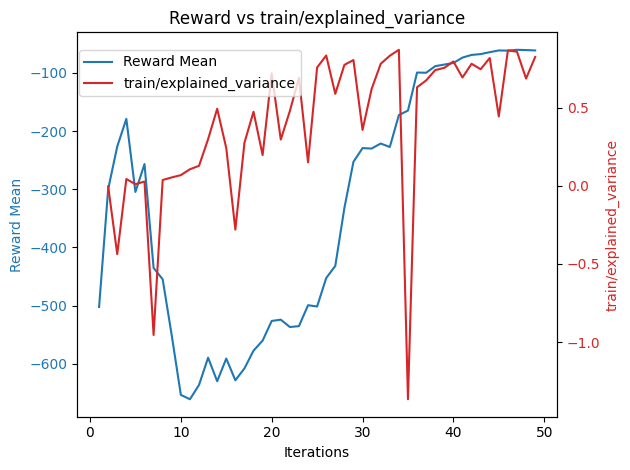

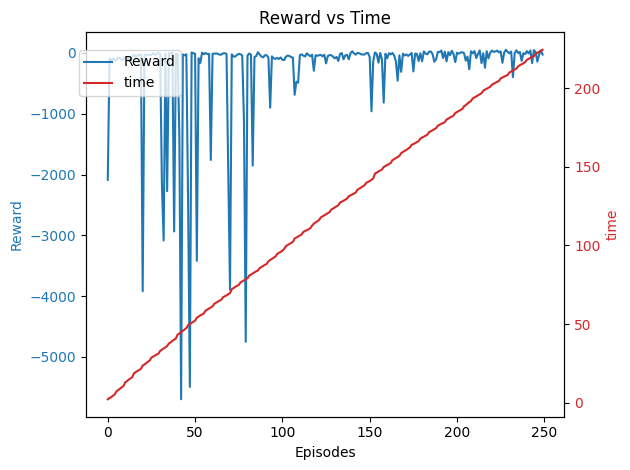

In [5]:
train_data_log: DataFrame = pd.read_csv(logs_path+"progress.csv")
train_data_monitor: DataFrame = pd.read_csv(logs_path+"monitor.csv", header=1)


print("Avaliable metrics: ", train_data_log.columns.to_list())

fig, ax1 = plt.subplots()

iterations: Series[int] = train_data_log['time/iterations'].astype(int)


ax1.set_xlabel('Iterations')
color = Color.BLUE.value
ax1.set_ylabel('Reward Mean', color=color)
ax1.plot(iterations,
         train_data_log['rollout/ep_rew_mean'], color=color, label='Reward Mean')
ax1.tick_params(axis='y', labelcolor=color)


col = 'train/explained_variance'

ax2 = ax1.twinx()
color = Color.RED.value
ax2.set_ylabel(col, color=color)
ax2.plot(iterations, train_data_log[col], color=color, label=col)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_title('Reward vs ' + col)


fig.tight_layout()
fig.legend(loc=Location.UPPER_LEFT.value, bbox_to_anchor=(0.12, 0.9))

plt.show()


fig, ax1 = plt.subplots()

episodes = range(len(train_data_monitor['l']))


ax1.set_xlabel('Episodes')
color = Color.BLUE.value
ax1.set_ylabel('Reward', color=color)
ax1.plot(episodes, train_data_monitor['r'], color=color, label='Reward')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_title('Reward vs Time')


ax2 = ax1.twinx()
color = Color.RED.value
ax2.set_ylabel('time', color=color)
ax2.plot(episodes, train_data_monitor['t'], color=color, label='time')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
fig.legend(loc=Location.UPPER_LEFT.value, bbox_to_anchor=(0.12, 0.9))

plt.show()

## Comprobación funcionamiento


In [6]:
seed = 289980628190634006122751570777790489191
env = make(env_id, seed=seed)
seed: int = env.np_random_seed
model = PPO.load(name, print_system_info=True)

num_steps = 1
obs, _ = env.reset(seed=seed)
# Variables de información:

stats = []
rewards = []

# -------------------------

_states = None
ant = env._get_info()
for episode in range(num_steps):

    done = False
    step_counter = 0
    while not done:
        action, _states = model.predict(obs, deterministic=True)
        obs, reward, done, terminated, info = env.step(action)

        stats.append(info["Stats"])
        rewards.append(reward)

        done: bool = done or terminated

    env.reset(seed=seed)
    step_counter += 1

# Debug
acciones = [x["Action"] for x in stats]
calcular_stats_acciones(acciones)

print(f"Seed: {env.np_random_seed}")

== CURRENT SYSTEM INFO ==
- OS: Windows-10-10.0.19045-SP0 10.0.19045
- Python: 3.12.6
- Stable-Baselines3: 2.4.1
- PyTorch: 2.5.1+cpu
- GPU Enabled: False
- Numpy: 1.26.4
- Cloudpickle: 3.1.0
- Gymnasium: 1.0.0

== SAVED MODEL SYSTEM INFO ==
- OS: Windows-10-10.0.19045-SP0 10.0.19045
- Python: 3.12.6
- Stable-Baselines3: 2.4.1
- PyTorch: 2.5.1+cpu
- GPU Enabled: False
- Numpy: 1.26.4
- Cloudpickle: 3.1.0
- Gymnasium: 1.0.0

DENEGAR: 18.25%
PERMITIR: 81.75%
Seed: 289980628190634006122751570777790489191


In [7]:
assert len(acciones) != acciones.count(
    Acciones.DENEGAR), "Se han denegado todos los paquetes"
assert len(acciones) != acciones.count(
    Acciones.PERMITIR), "Se han permitido todos los paquetes"

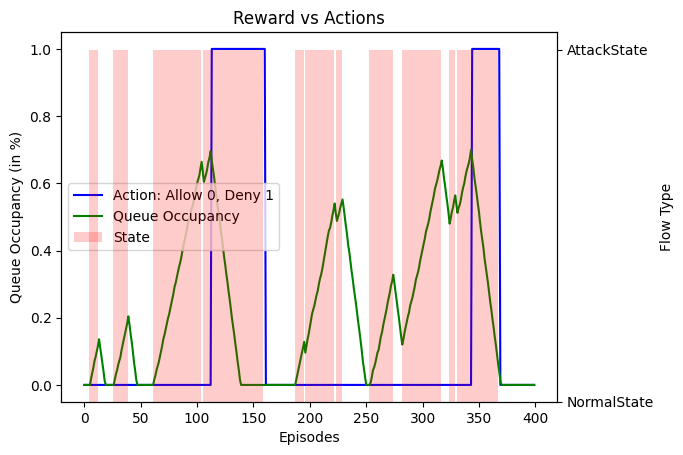

Rewards:  [0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.196, 0.1928, 0.1896, 0.18560000000000001, 0.18320000000000003, 0.18000000000000002, 0.1768, 0.1728, 0.1776, 0.1824, 0.1872, 0.192, 0.1976, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.1968, 0.1936, 0.1912, 0.188, 0.18560000000000001, 0.18320000000000003, 0.17920000000000003, 0.17600000000000002, 0.1728, 0.1696, 0.1664, 0.1632, 0.1592, 0.16400000000000003, 0.1696, 0.1744, 0.18000000000000002, 0.1864, 0.1912, 0.1968, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.1968, 0.19440000000000002, 0.1912, 0.1888, 0.1864, 0.18320000000000003, 0.18000000000000002, 0.1768, 0.1728, 0.1704, 0.16720000000000002, 0.16400000000000003, 0.16080000000000003, 0.1584, 0.1552, 0.15200000000000002, 0.14880000000000002, 0.1456, 0.1416, 0.1392, 0.13599999999999998, 0.1328, 0.12960000000000002, 0.1272, 0.124, 0.12, 0.11680000000000001, 0.11360000000000002, 0.11040000000000001, 0.10720000000000002, 0.10320000000000001, 0.1008, 0.0992000000000000

In [8]:
assert len(acciones) == len(rewards)
# plt.plot(rewards, label="rewards")

fig, ax1 = plt.subplots()
ocu = [x["OcupacionActual"] for x in stats]
estados = [x["EstadoMaquina"] for x in stats]
acciones = [Acciones.action_to_int(x["Action"]) for x in stats]

# Primer eje Y con acciones y ocupación de cola
ax1.plot(
    acciones, label=f"Action: Allow {Acciones.action_to_int(Acciones.PERMITIR)}, Deny {Acciones.action_to_int(Acciones.DENEGAR)}", color='#0000FF')
ax1.plot(ocu, label="Queue Occupancy", color='green')
ax1.set_xlabel("Episodes")
ax1.set_ylabel("Queue Occupancy (in %)")
ax1.set_title("Reward vs Actions")

# Segundo eje Y con estados en gráfico de barras
ax2 = ax1.twinx()
ax2.bar(range(len(estados)), estados, color='red',
        label="State", alpha=0.20, width=1)
ax2.set_ylabel("Flow Type")

# Combinar leyendas de ambos ejes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2)

plt.show()


print("Rewards: ", rewards)
calcular_stats_acciones(acciones)

Ocupación:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.02, 0.036, 0.052, 0.072, 0.084, 0.1, 0.116, 0.136, 0.112, 0.088, 0.064, 0.04, 0.012, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.016, 0.032, 0.044, 0.06, 0.072, 0.084, 0.104, 0.12, 0.136, 0.152, 0.168, 0.184, 0.204, 0.18, 0.152, 0.128, 0.1, 0.068, 0.044, 0.016, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.016, 0.028, 0.044, 0.056, 0.068, 0.084, 0.1, 0.116, 0.136, 0.148, 0.164, 0.18, 0.196, 0.208, 0.224, 0.24, 0.256, 0.272, 0.292, 0.304, 0.32, 0.336, 0.352, 0.364, 0.38, 0.4, 0.416, 0.432, 0.448, 0.464, 0.484, 0.496, 0.504, 0.524, 0.532, 0.548, 0.564, 0.584, 0.6, 0.612, 0.624, 0.644, 0.664, 0.636, 0.604, 0.616, 0.628, 0.644, 0.664, 0.676, 0.696, 0.668, 0.644, 0.62, 0.592, 0.564, 0.536, 0.512, 0.488, 0.46, 0.436, 0.408, 0.38, 0.356, 0.328, 0.304, 0.276, 0.252, 0.224, 0.196, 0.172, 0.148, 0.12, 0.096, 0.068, 0.044, 0.016, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

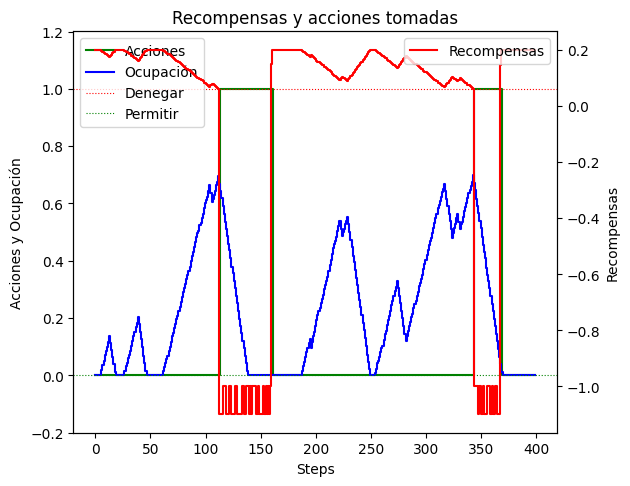

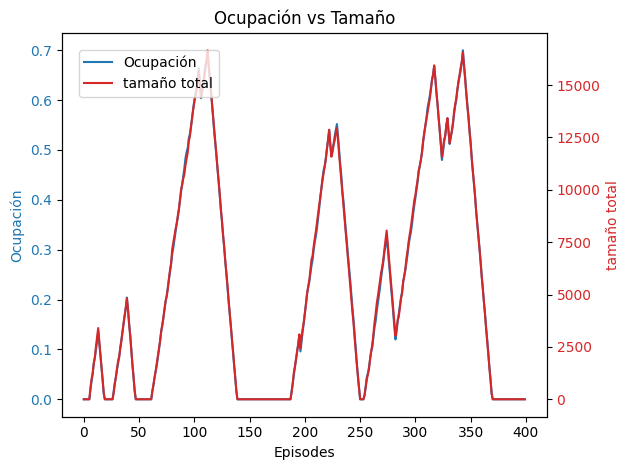

La ocupación máxima es de 70%
La ocupación mínima es de 0%


In [9]:
print("Ocupación: ", ocu)
fig, ax1 = plt.subplots()

# Configurar el eje X e Y
ax1.set_xlabel('Steps')
ax1.set_ylabel('Acciones y Ocupación')

# Graficar las acciones y la ocupación
ax1.step(range(len(acciones)), acciones,
         label="Acciones", where='post', color='green')
ax1.step(range(len(ocu)), ocu, label="Ocupación", where='mid', color='blue')


# Agregar marca en el eje Y
ticks = list(ax1.get_yticks())  # Obtener los ticks actuales

ax1.set_yticks(sorted(ticks))  # Actualizar los ticks


ax1.axhline(y=Acciones.action_to_int(Acciones.DENEGAR), color='red',
            linestyle='dotted', linewidth=0.8, label='Denegar')
ax1.axhline(y=Acciones.action_to_int(Acciones.PERMITIR),
            color='green', linestyle='dotted', linewidth=0.8, label='Permitir')


# Leyenda del primer eje
ax1.legend(loc=Location.UPPER_LEFT.value)

# Crear segundo eje Y para las recompensas
ax2 = ax1.twinx()
ax2.set_ylabel('Recompensas')
ax2.step(range(len(rewards)), rewards,
         label="Recompensas", where='mid', color='r')

# Leyenda del segundo eje
ax2.legend(loc=Location.UPPER_RIGHT.value)

# Ajustar diseño y mostrar título
fig.tight_layout()
plt.title("Recompensas y acciones tomadas")
plt.show()


tam = [x["TamañoTotal"] for x in stats]


fig, ax1 = plt.subplots()

train_data_monitor: DataFrame = pd.read_csv(logs_path+"monitor.csv", header=1)

episodes = range(len(train_data_monitor['l']))

# Plot rollout/ep_rew_mean on the first y-axis
ax1.set_xlabel('Episodes')
color = Color.BLUE.value
label = 'Ocupación'
ax1.set_ylabel(label, color=color)
ax1.plot(range(len(ocu)), ocu, color=color, label=label)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_title('Ocupación vs Tamaño')


ax2 = ax1.twinx()
color = Color.RED.value
label = 'tamaño total'
ax2.set_ylabel(label, color=color)
ax2.plot(range(len(tam)), tam, color=color, label=label)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
fig.legend(loc=Location.UPPER_LEFT.value, bbox_to_anchor=(0.12, 0.9))

plt.show()

print(f"La ocupación máxima es de {np.max(ocu):.0%}")
print(f"La ocupación mínima es de {np.min(ocu):.0%}")